# Visualisation des données d'apprentissage sur le dataset Moodle
# méthode PCA :(Principal Component Analysis) à deux dimensions


In [1]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)

from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs


## 1. Load Data.

In [5]:
data = {}
data[0] = np.load('..\\data\\moodle2017\\features\\ls_ar.npy'),np.load('..\\data\\moodle2017\\labels\\label_ar.npy')
data[1] = np.load('..\\data\\moodle2017\\features\\ls_si.npy'),np.load('..\\data\\moodle2017\\labels\\label_si.npy')
data[2] = np.load('..\\data\\moodle2017\\features\\ls_vv.npy'),np.load('..\\data\\moodle2017\\labels\\label_vv.npy')
data[3] = np.load('..\\data\\moodle2017\\features\\ls_sg.npy'),np.load('..\\data\\moodle2017\\labels\\label_sg.npy')


In [6]:
learning_styles = ["Active Reflective","Sensitive Intuitive","Visual Verbal","Sequential Global"]
FSLSM = ["A/R","S/I","V/V","S/G"]

In [7]:
targets = {}
for i in range(0, len(data)):
    targets[i] = data[i][1]

In [8]:
pca = PCA(n_components=2)
principalComponents = {}
def compute_pca(data):
    for i in range(0, len(data)):
        principalComponents[i] = pca.fit_transform(data[i][0])
        print(principalComponents[i].shape)
        print(pca.explained_variance_)

In [9]:
print (data[0][0].shape)
print (data[1][0].shape)
print (data[2][0].shape)
print (data[3][0].shape)

(2168, 39)
(2168, 25)
(2168, 14)
(2168, 12)


## 2. Compute PCA on moodle data

In [10]:
compute_pca(data)

(2168, 2)
[2297.25910176  818.15918384]
(2168, 2)
[23584.3842106   1164.81651213]
(2168, 2)
[107623.94614379   5528.03722749]
(2168, 2)
[324.25720102  30.1409657 ]


## 3. Visualize data distribution

In [16]:
def show_scatter(principalComponents,y,title,code):
    plt.rcParams["figure.figsize"] = (9, 8)
    plt.scatter(principalComponents[:,0],principalComponents[:,1])
    plt.title("PCA {} distribution".format(title))
    plt.xlabel("feature_pca_0 {}".format(code))
    plt.ylabel("feature_pca_1 {}".format(code))
    #plt.xlim(-2.3, 6.5)
    #plt.ylim(-2.3, 6.5)
    plt.axis('equal');
    #plt.show()
    #figure()
    plt.savefig('distribution.png'.format(code))

In [17]:
def show_scatter_one_shot(principalComponents,title,code):
    X=principalComponents
    fig, axes = plt.subplots(1, len(data), figsize=(17, 3))
    for i, ax in zip(range(0,len(data)), axes):
        ax.scatter(X[i][:, 0], X[i][:, 1])
        ax.set_title("PCA {} distribution".format(title[i]))
        ax.set_xlabel("feature_pca_0 {}".format(code[i]))
        ax.set_ylabel("feature_pca_1 {}".format(code[i]))

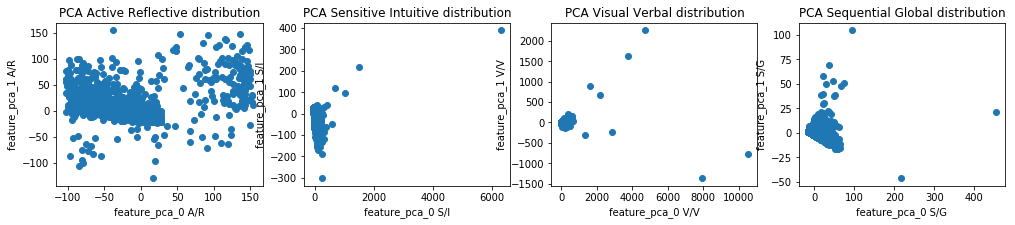

In [18]:
show_scatter_one_shot(principalComponents,learning_styles,FSLSM)

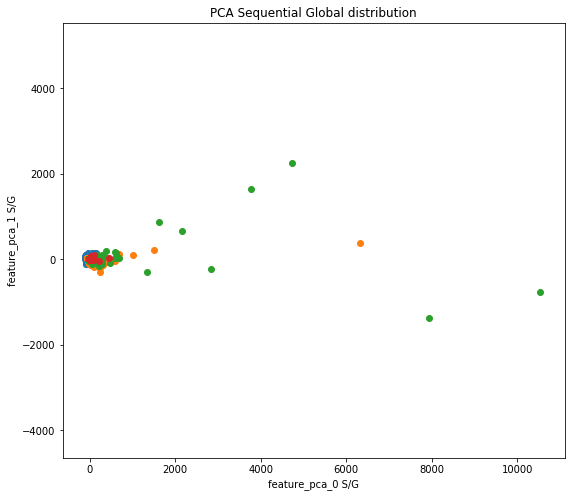

In [19]:
for i in range(0, len(data)):
    show_scatter(principalComponents[i],data[i][1],learning_styles[i],FSLSM[i])

## 4. Visualize label distribution on the data for separability

In [20]:
def show_label_distribution(pos):
    i=pos
    labels = data[i][1]
    ind0 = np.where(labels==0)[0]
    ind1 = np.where(labels==1)[0]
    #ind00 = np.nonzero(ind0==0)
    #ind11 = np.nonzero(ind1==1)
    #print(ind1)
    mx = principalComponents[i]#np.vstack(principalComponents[0][:,1])
    print ('shape pca: ',mx.shape)
    XPos = mx[ind1,:]
    XNeg = mx[ind0,:]
    #assert (XPos.shape == XNeg.shape)
    print ('shape XPos: ',XPos.shape)
    print ('shape XNeg: ',XNeg.shape)
    plt.title("Label {} distribution".format(FSLSM[i]))
    plt.plot(XPos[:,0],XPos[:,1],'o')
    plt.plot(XNeg[:,0],XNeg[:,1],'*')
    plt.xlabel("feature_pca_0 {}".format(FSLSM[i]))
    plt.ylabel("feature_pca_1 {}".format(FSLSM[i]))
    plt.show()

In [21]:
def show_label_distribution_one_shot(targets,principalComponents,code):
    X=principalComponents
    fig, axes = plt.subplots(1, len(data), figsize=(17, 3))
    for i, ax in zip(range(0,len(data)), axes):
        ax.set_title("Label {} distribution".format(code[i]))
        ax.set_xlabel("feature_pca_0 {}".format(code[i]))
        ax.set_ylabel("feature_pca_1 {}".format(code[i]))
        labels = targets[i]
        ind0 = np.where(labels==0)[0]
        ind1 = np.where(labels==1)[0]
        mx = principalComponents[i]
        print ('shape pca: ',mx.shape)
        XPos = mx[ind1,:]
        XNeg = mx[ind0,:]
        #assert XPos.shape == XNeg.shape, "The data should have same shape"
        print ('shape XPos: ',XPos.shape)
        print ('shape XNeg: ',XNeg.shape)
        ax.plot(XPos[:,0],XPos[:,1],'o')
        ax.plot(XNeg[:,0],XNeg[:,1],'*')

shape pca:  (2168, 2)
shape XPos:  (1130, 2)
shape XNeg:  (1038, 2)
shape pca:  (2168, 2)
shape XPos:  (1210, 2)
shape XNeg:  (958, 2)
shape pca:  (2168, 2)
shape XPos:  (1080, 2)
shape XNeg:  (1088, 2)
shape pca:  (2168, 2)
shape XPos:  (790, 2)
shape XNeg:  (1378, 2)


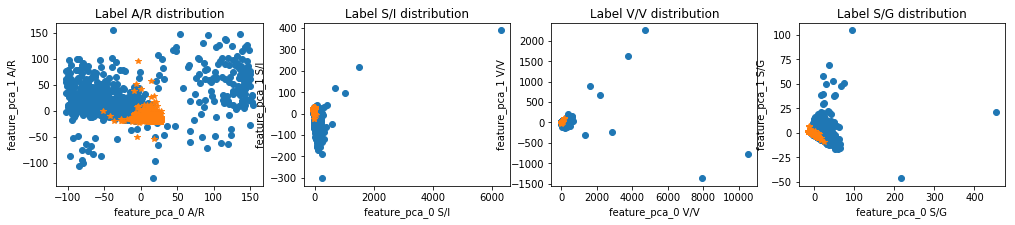

In [22]:
show_label_distribution_one_shot(targets,principalComponents,FSLSM)

shape pca:  (2168, 2)
shape XPos:  (790, 2)
shape XNeg:  (1378, 2)


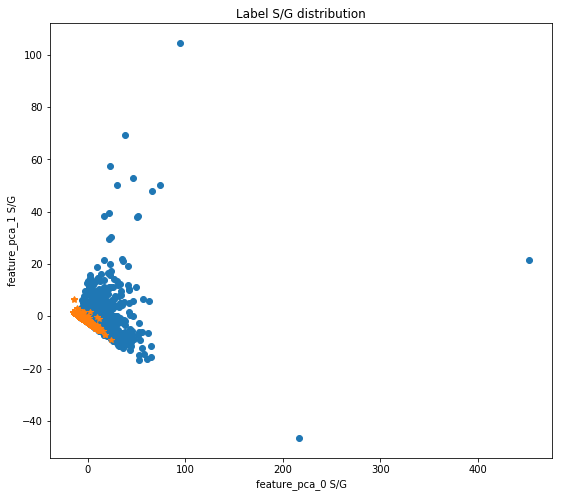

In [23]:
show_label_distribution(3)

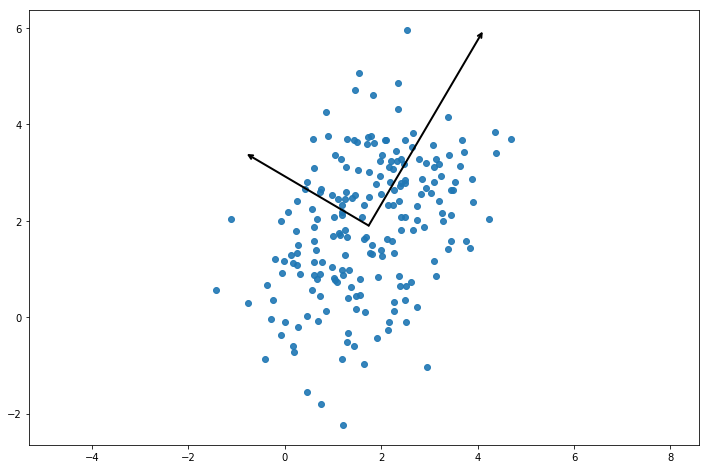

In [34]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.9)
plt.xlim(-2.3, 6.5)
plt.ylim(-2.3, 6.5)
plt.axis('equal') # important pour que les vecteurs s'affichent orthogonaux

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

#plt.savefig('PCA-2D.pdf')

plt.show()